In [144]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
train=pd.read_csv("../input/train.csv")

['test.csv', 'train.csv', 'sample_submission.csv', 'data_description.txt']


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


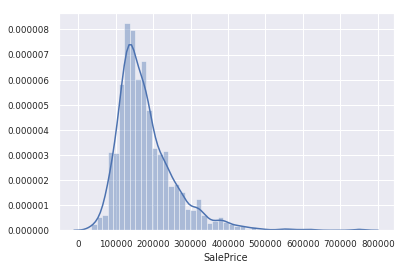

In [145]:
#train.shape
id_train=train["Id"]

#statistics summary
print(train["SalePrice"].describe())
train.drop("Id",axis=1,inplace=True)
sns.distplot(train["SalePrice"])

In [146]:
print("Skewness : "+ str(train["SalePrice"].skew()))
print("kurtosis : "+ str(train["SalePrice"].kurt()))
print("mean : "+ str(train["SalePrice"].mean()))


Skewness : 1.8828757597682129
kurtosis : 6.536281860064529
mean : 180921.19589041095


**Correlation**

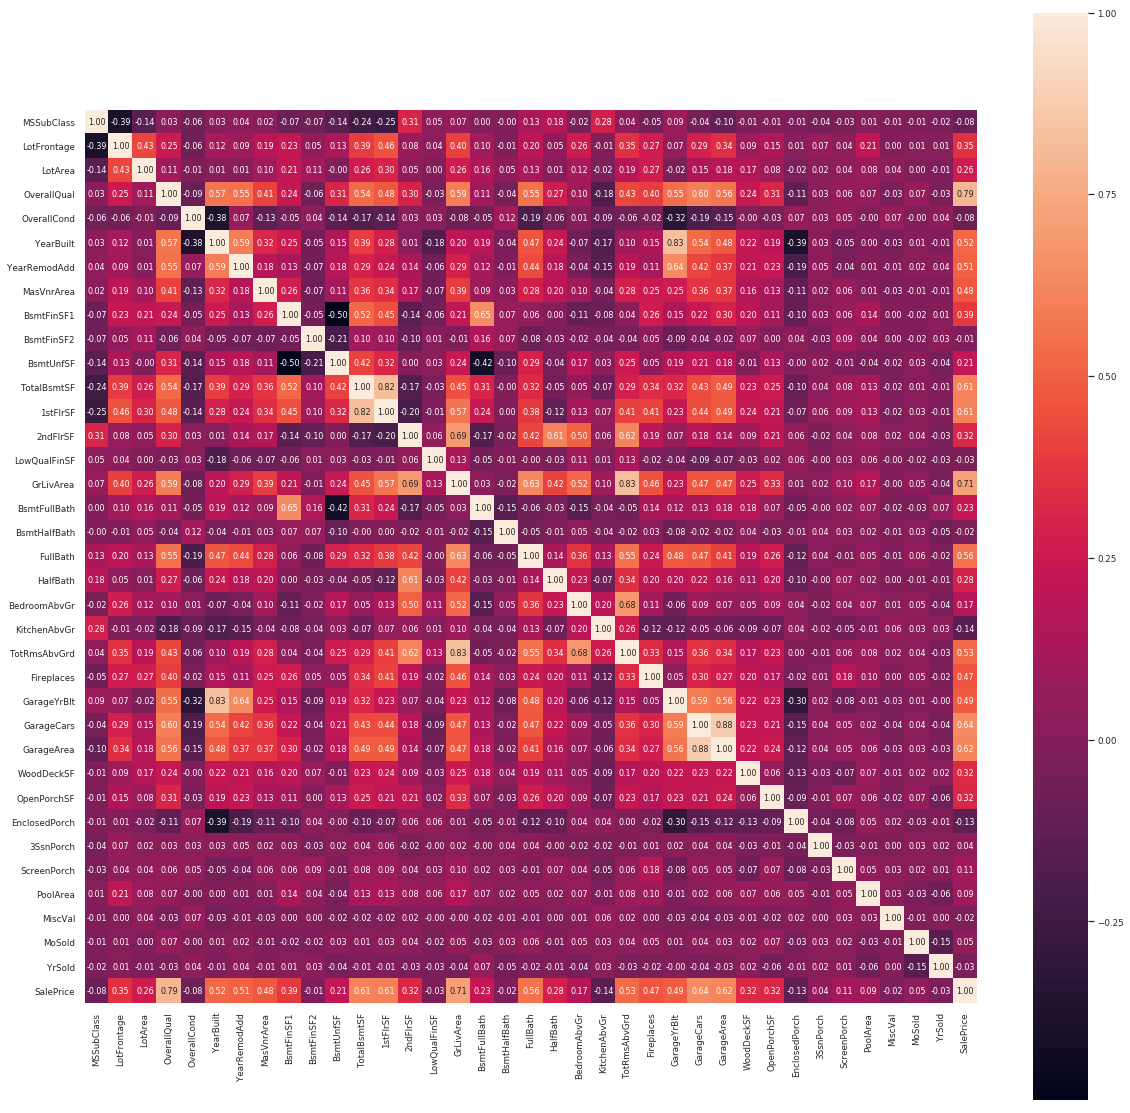

In [147]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 20))
#sns.heatmap(corrmat, vmax=.8, square=True);
sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8})

1. Using this matrix, we can find out how features correlates with SalePrice.
2. We can find out the features that highly contributes to the prediction of SalePrice.

> *Top 20 highly contributing features*

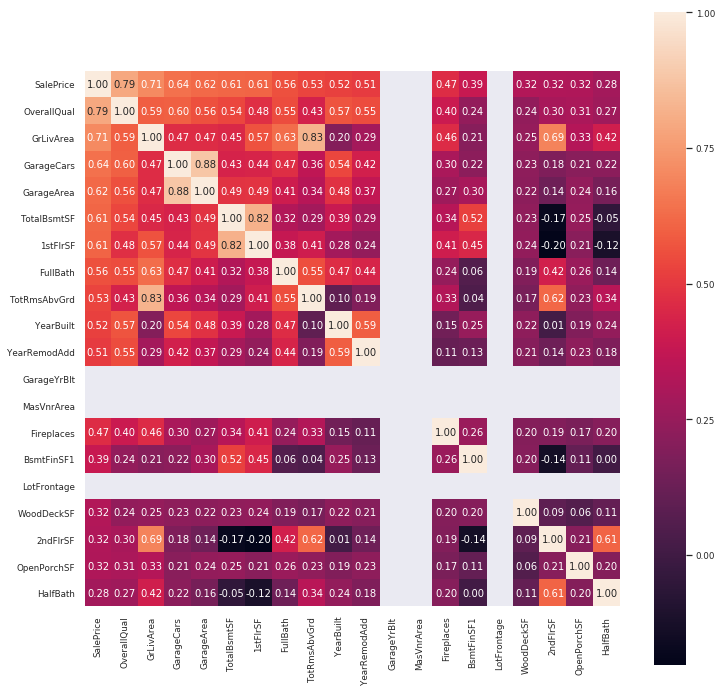

In [148]:
#saleprice correlation matrix
k = 20
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=0.8)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

**Scatter Plot and Outlier removal of highly correlated features**

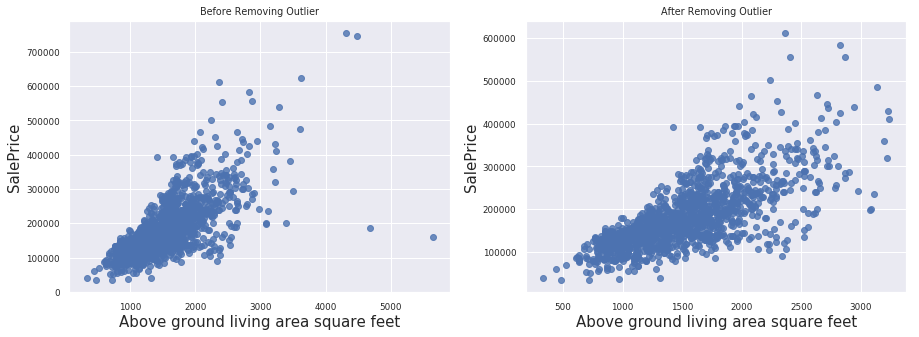

In [149]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
g = sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=False)
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Above ground living area square feet', fontsize=15)
plt.title("Before Removing Outlier")

# Delete outliers
plt.subplot(1, 2, 2)                                                                                
train = train.drop(train[(train['GrLivArea']>3250)].index)
g = sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=False).set_title("After Removing Outlier")
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Above ground living area square feet', fontsize=15)
plt.title("After Removing Outlier")
plt.show()

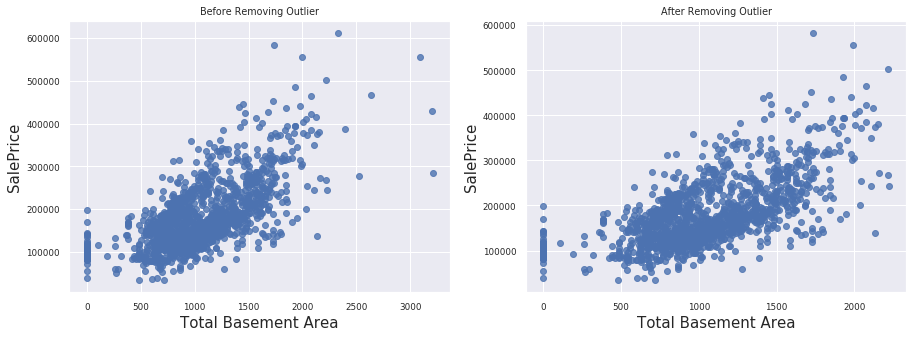

In [150]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
g = sns.regplot(x=train['TotalBsmtSF'], y=train['SalePrice'], fit_reg=False)
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Total Basement Area', fontsize=15)
plt.title("Before Removing Outlier")

# Delete outliers
plt.subplot(1, 2, 2)                                                                                
train = train.drop(train[(train['TotalBsmtSF']>2300)].index)
g = sns.regplot(x=train['TotalBsmtSF'], y=train['SalePrice'], fit_reg=False).set_title("After Removing Outlier")
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Total Basement Area', fontsize=15)
plt.title("After Removing Outlier")
plt.show()

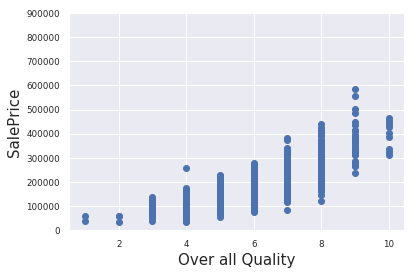

In [151]:
fig, ax = plt.subplots()
ax.scatter(x = train['OverallQual'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Over all Quality', fontsize=15)
plt.ylim(0,900000)
plt.show()

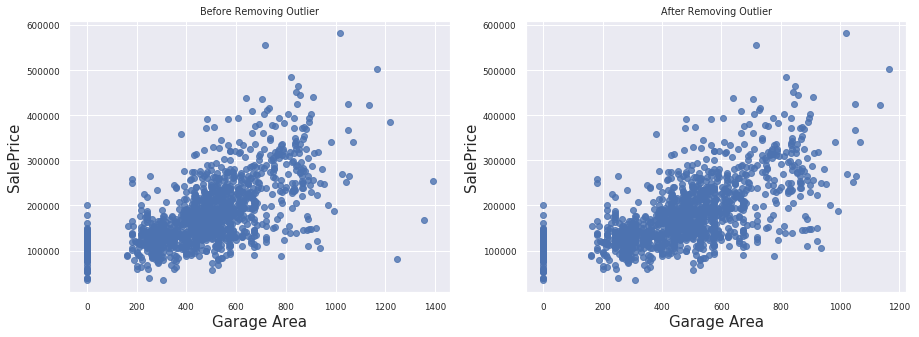

In [152]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
g = sns.regplot(x=train['GarageArea'], y=train['SalePrice'], fit_reg=False)
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Garage Area', fontsize=15)
plt.title("Before Removing Outlier")

# Delete outliers
plt.subplot(1, 2, 2)                                                                                
train = train.drop(train[(train['GarageArea']>1200)].index)
g = sns.regplot(x=train['GarageArea'], y=train['SalePrice'], fit_reg=False).set_title("After Removing Outlier")
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Garage Area', fontsize=15)
plt.title("After Removing Outlier")
plt.show()

> *From the scatter plot and as well as from the Correlation table, we can say that GarageArea is highly correlated to SalePrice*

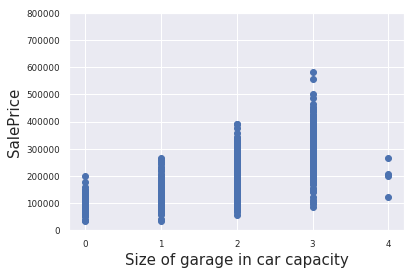

In [153]:
fig, ax = plt.subplots()
ax.scatter(x = train['GarageCars'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Size of garage in car capacity', fontsize=15)
plt.ylim(0,800000)
plt.xticks(np.arange(0, 5, 1.0))
plt.show()

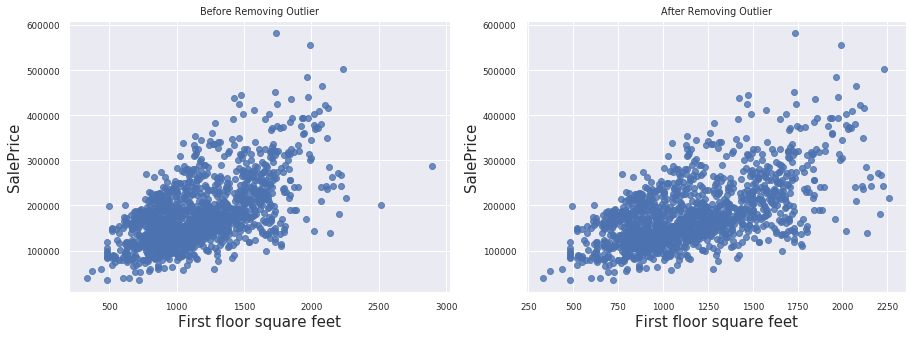

In [154]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
g = sns.regplot(x=train['1stFlrSF'], y=train['SalePrice'], fit_reg=False)
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('First floor square feet', fontsize=15)
plt.title("Before Removing Outlier")

# Delete outliers
plt.subplot(1, 2, 2)                                                                                
train = train.drop(train[(train['1stFlrSF']>2500)].index)
g = sns.regplot(x=train['1stFlrSF'], y=train['SalePrice'], fit_reg=False).set_title("After Removing Outlier")
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('First floor square feet', fontsize=15)
plt.title("After Removing Outlier")
plt.show()

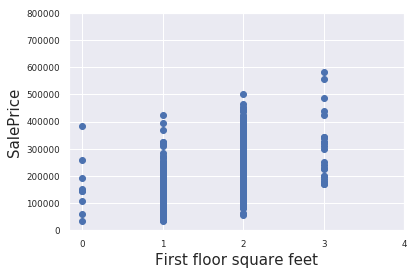

In [155]:
fig, ax = plt.subplots()
ax.scatter(x = train['FullBath'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('First floor square feet', fontsize=15)
plt.ylim(0,800000)
plt.xticks(np.arange(0, 5, 1.0))
plt.show()

In [156]:
test=pd.read_csv('../input/test.csv')
test.drop(['Id'],inplace=True,axis=1)
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
joineddata = pd.concat((train, test)).reset_index(drop=True)
joineddata.drop(['SalePrice'], axis=1, inplace=True)

> *Features having highest percentage of missing values are sorted.*

In [157]:
missVal=(joineddata.isnull().sum()/len(joineddata))*100
missVal=pd.DataFrame({"Columns":missVal.index,"missPcnt":missVal.values})
missVal=missVal.drop(missVal[(missVal['missPcnt']==0)].index)
missVal=missVal.sort_values(by=['missPcnt'],ascending=False)
missVal

,Columns,missPcnt
65,PoolQC,99.723757
56,MiscFeature,96.408840
3,Alley,93.197514
25,Fence,80.421271
26,FireplaceQu,48.964088
49,LotFrontage,16.574586
33,GarageCond,5.455801
35,GarageQual,5.455801
37,GarageYrBlt,5.455801
34,GarageFinish,5.455801


> *Missing percentage plotted.*

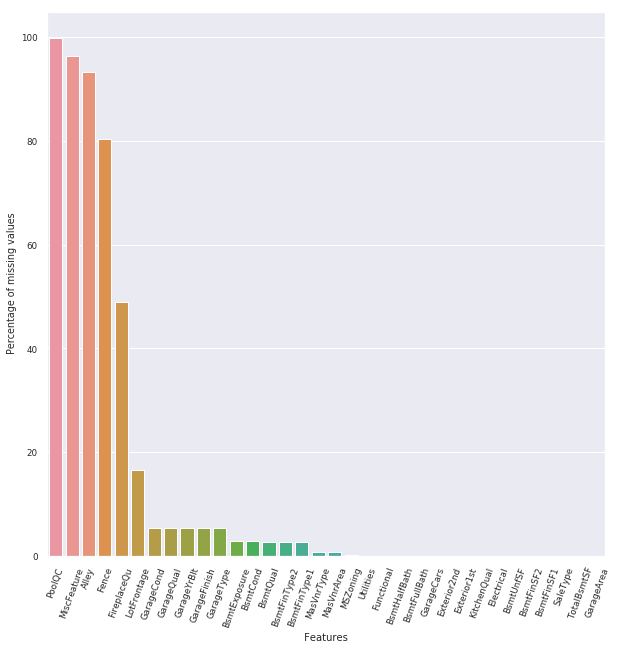

In [158]:
f, ax= plt.subplots(figsize=(10,10))
plt.xticks(rotation=70)
sns.barplot(y=missVal['missPcnt'],x=missVal['Columns'])
plt.xlabel(" Features ", Fontsize=10)
plt.ylabel(" Percentage of missing values")
plt.show()

In [159]:
joineddata["PoolQC"] = joineddata["PoolQC"].fillna("None")
joineddata["MiscFeature"] = joineddata["MiscFeature"].fillna("None")
joineddata["Alley"] = joineddata["Alley"].fillna("None")
joineddata["Fence"] = joineddata["Fence"].fillna("None")
joineddata["FireplaceQu"] = joineddata["FireplaceQu"].fillna("None")
joineddata["LotFrontage"] = joineddata.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    joineddata[col] = joineddata[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    joineddata[col] = joineddata[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    joineddata[col] = joineddata[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    joineddata[col] = joineddata[col].fillna('None')
joineddata["MasVnrType"] = joineddata["MasVnrType"].fillna("None")
joineddata["MasVnrArea"] = joineddata["MasVnrArea"].fillna(0)
joineddata['MSZoning'] = joineddata['MSZoning'].fillna(joineddata['MSZoning'].mode()[0])
joineddata["Functional"] = joineddata["Functional"].fillna("Typ")
joineddata['Electrical'] = joineddata['Electrical'].fillna(joineddata['Electrical'].mode()[0])
joineddata['KitchenQual'] = joineddata['KitchenQual'].fillna(joineddata['KitchenQual'].mode()[0])
joineddata['Exterior1st'] = joineddata['Exterior1st'].fillna(joineddata['Exterior1st'].mode()[0])
joineddata['Exterior2nd'] = joineddata['Exterior2nd'].fillna(joineddata['Exterior2nd'].mode()[0])
joineddata['SaleType'] = joineddata['SaleType'].fillna(joineddata['SaleType'].mode()[0])
joineddata['MSSubClass'] = joineddata['MSSubClass'].fillna("None")

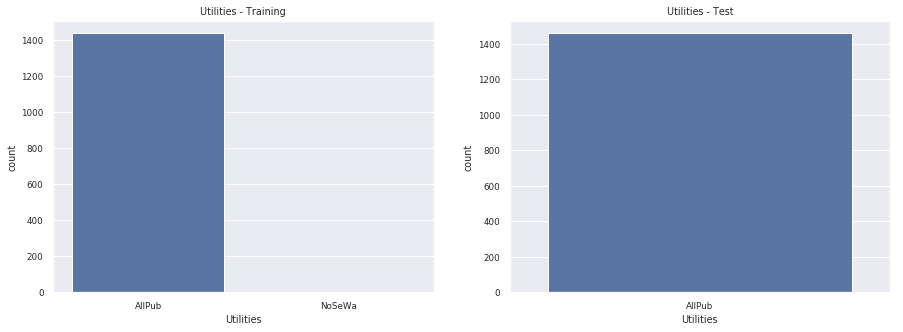

In [160]:
plt.subplots(figsize =(15, 5))
plt.subplot(1, 2, 1)
g = sns.countplot(x = "Utilities", data = train).set_title("Utilities - Training")
plt.subplot(1, 2, 2)
g = sns.countplot(x = "Utilities", data = test).set_title("Utilities - Test")

> *The training data has a feature named Utilities, which consists of two values **AllPub** and **NoSeWa** but the test data only have **AllPub** as Utilities values. So we can drop this Feature.*

In [161]:
joineddata=joineddata.drop(['Utilities'],axis=1)

Text(0.5, 0, 'Basement Quality')

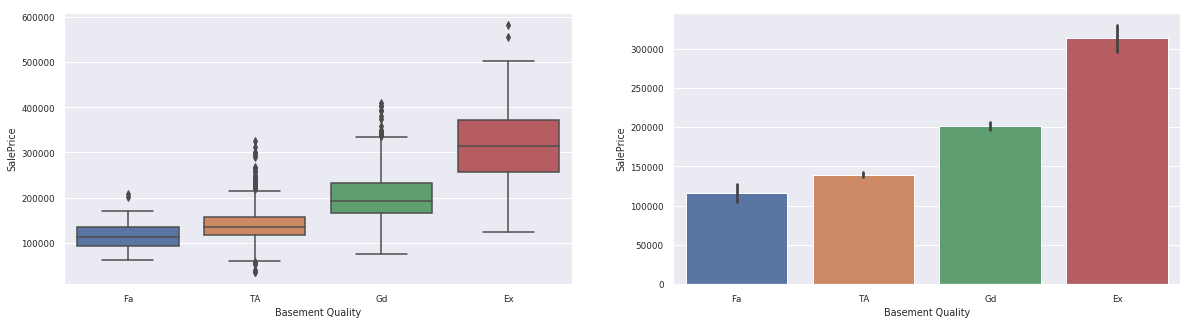

In [162]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=train["BsmtQual"], y=train["SalePrice"], data=train, order=['Fa', 'TA', 'Gd', 'Ex']);
plt.xlabel("Basement Quality")
plt.subplot(1, 2, 2)
sns.barplot(x="BsmtQual", y="SalePrice", data=train, order=['Fa', 'TA', 'Gd', 'Ex']);
plt.xlabel("Basement Quality")

> *Basement Quality is highly correlated to SalePrice. Better the quality of the Basement, higher is the SalePrice. *

In [163]:
joineddata["BsmtQual"]=joineddata["BsmtQual"].map({"None":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})

Text(0.5, 0, 'Basement Condition')

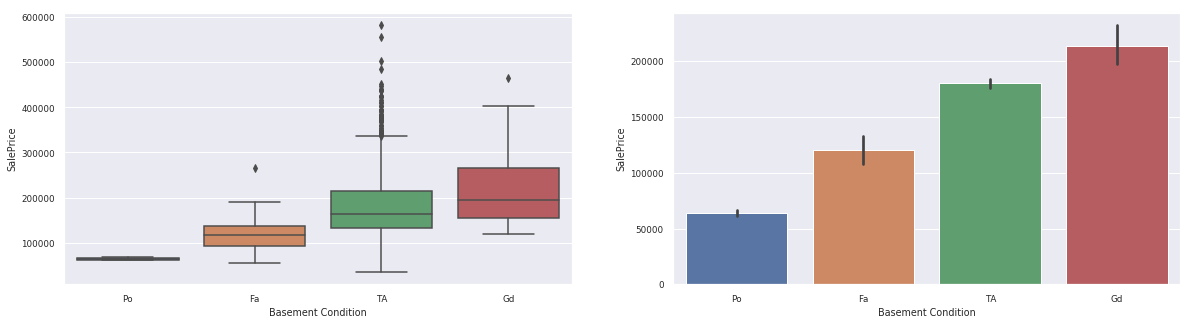

In [164]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="BsmtCond", y="SalePrice", data=train, order=['Po', 'Fa', 'TA', 'Gd']);
plt.xlabel("Basement Condition")
plt.subplot(1, 2, 2)
sns.barplot(x="BsmtCond", y="SalePrice", data=train, order=['Po', 'Fa', 'TA', 'Gd']);
plt.xlabel("Basement Condition")

> *This Boxplot may indicate that Basement Condition is highly correlating. But, there are some very high SalePrice values for houses with Typical Basement. This particular value of the Basement Condition Feature may correlate but overall the Feature is not highly influential. *

In [165]:
joineddata['BsmtCond'] = joineddata['BsmtCond'].map({"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})

Text(0.5, 0, 'Basement Exposure')

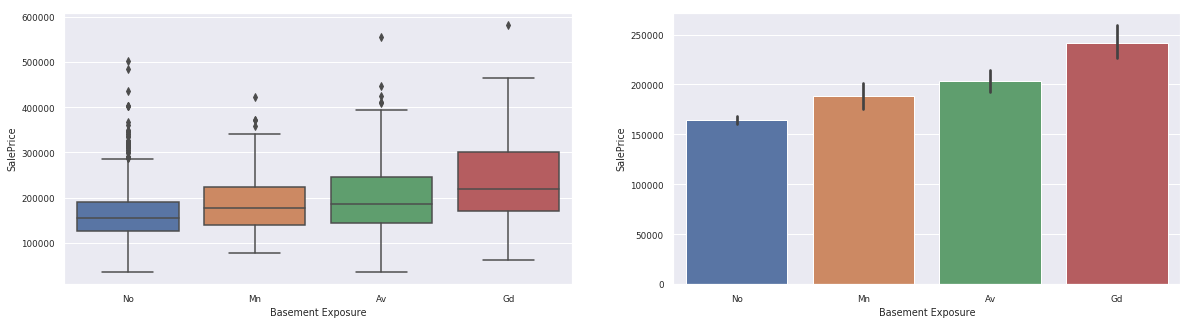

In [166]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="BsmtExposure", y="SalePrice", data=train, order=['No', 'Mn', 'Av', 'Gd']);
plt.xlabel("Basement Exposure")
plt.subplot(1, 2, 2)
sns.barplot(x="BsmtExposure", y="SalePrice", data=train, order=['No', 'Mn', 'Av', 'Gd']);
plt.xlabel("Basement Exposure")

> *SalePrice increases with the amount of Exposure. Basement Exposure is correlating to SalePrice, but not hugely correlating.*

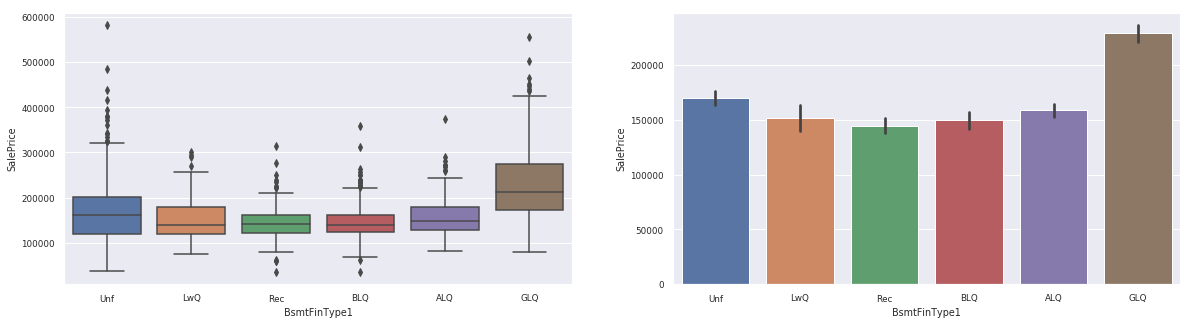

In [167]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="BsmtFinType1", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]);
plt.subplot(1, 2, 2)
sns.barplot(x="BsmtFinType1", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]);

In [168]:
joineddata = pd.get_dummies(joineddata, columns = ["BsmtFinType1"], prefix="BsmtFinType1")

> *For Bathrooms, summation of all the Features is done.*

In [169]:
joineddata['TotalBathrooms'] = joineddata['BsmtHalfBath'] + joineddata['BsmtFullBath'] + joineddata['HalfBath'] + joineddata['FullBath']
columns = ['BsmtHalfBath', 'BsmtFullBath', 'HalfBath', 'FullBath']
joineddata.drop(columns, axis=1, inplace=True)

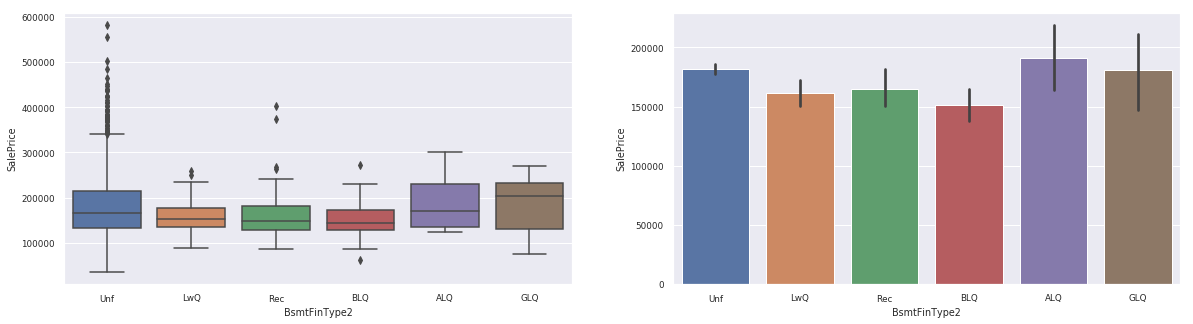

In [170]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="BsmtFinType2", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]);
plt.subplot(1, 2, 2)
sns.barplot(x="BsmtFinType2", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]);

> **Kitchen Quality**

Text(0.5, 0, 'Kitchen Quality')

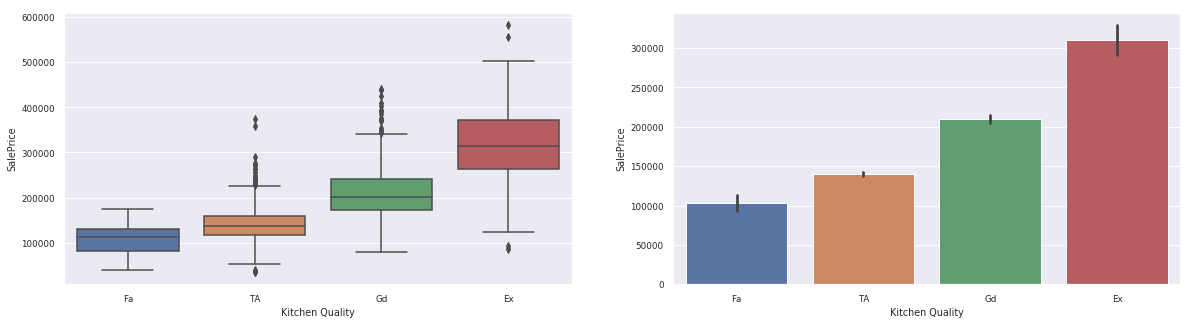

In [171]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="KitchenQual", y="SalePrice", data=train, order=["Fa", "TA", "Gd", "Ex"])
plt.xlabel("Kitchen Quality")
plt.subplot(1, 2, 2)
sns.barplot(x="KitchenQual", y="SalePrice", data=train, order=["Fa", "TA", "Gd", "Ex"]);
plt.xlabel("Kitchen Quality")

> Kitchen Quality shows positive correlation with SalePrice. 

In [172]:
joineddata["KitchenQual"]=joineddata["KitchenQual"].map({"Fa":1,"TA":2,"Gd":3,"Ex":4})

Text(0.5, 0, 'Overall Quality')

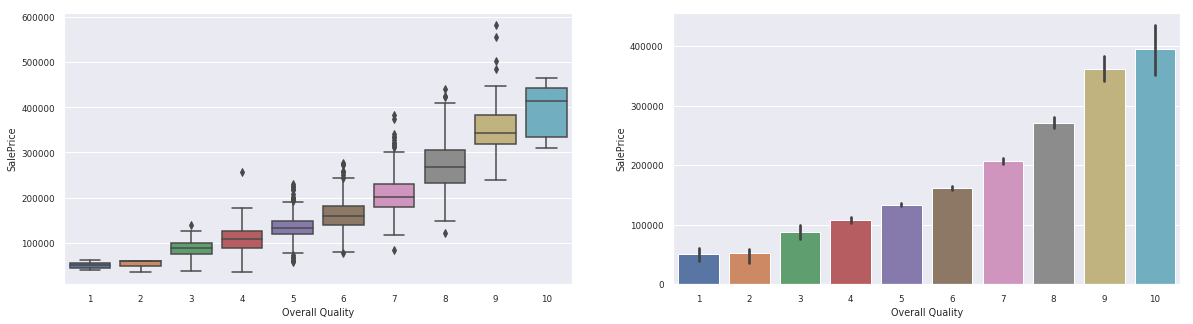

In [173]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="OverallQual", y="SalePrice", data=train);
plt.xlabel("Overall Quality")
plt.subplot(1, 2, 2)
sns.barplot(x="OverallQual", y="SalePrice", data=train);
plt.xlabel("Overall Quality")

> *Overall Quality shows huge positive correlation with SalePrice*

Text(0.5, 0, 'External Quality')

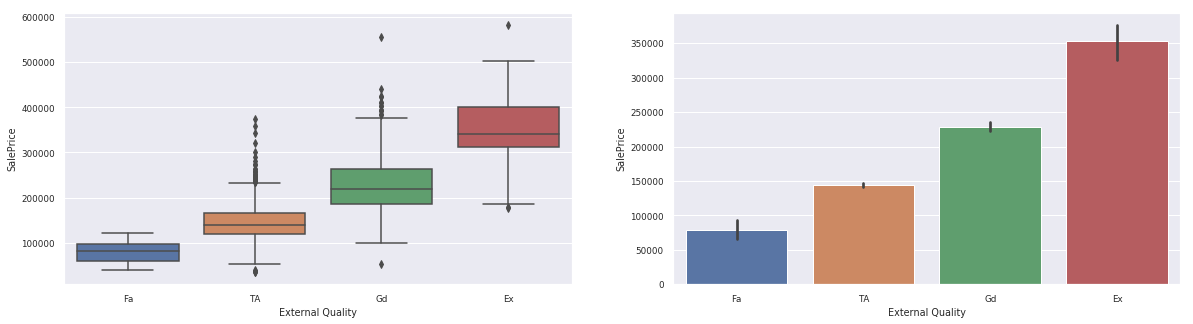

In [174]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 2,1)
sns.boxplot(x="ExterQual", y="SalePrice", data=train, order=['Fa','TA','Gd', 'Ex'])
plt.xlabel("External Quality")
plt.subplot(1, 2,2)
sns.barplot(x="ExterQual", y="SalePrice", data=train, order=['Fa','TA','Gd', 'Ex']);
plt.xlabel("External Quality")

> *External Quality shows postive correlation with SalePrice*

Text(0.5, 0, 'Fireplace Quality')

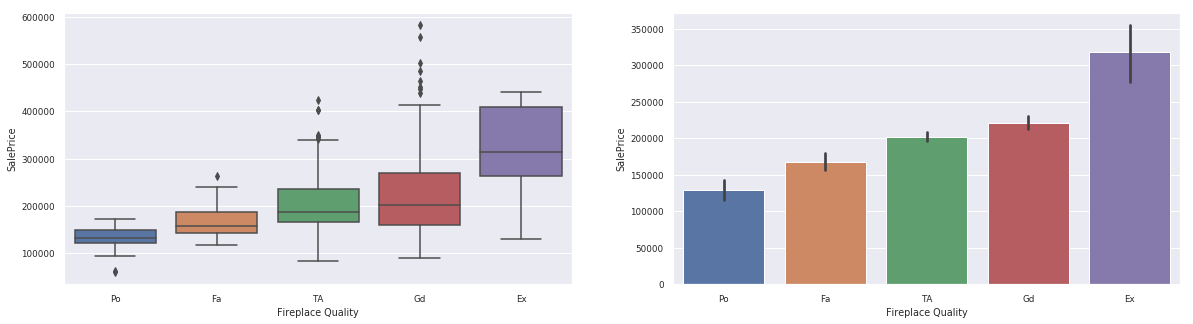

In [175]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="FireplaceQu", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"])
plt.xlabel("Fireplace Quality")
plt.subplot(1, 2, 2)
sns.barplot(x="FireplaceQu", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"]);
plt.xlabel("Fireplace Quality")

> *Fireplace Quality shows postive correlation with SalePrice*

In [176]:
joineddata['ExterQual'] = joineddata['ExterQual'].map({"Fa":1, "TA":2, "Gd":3, "Ex":4})


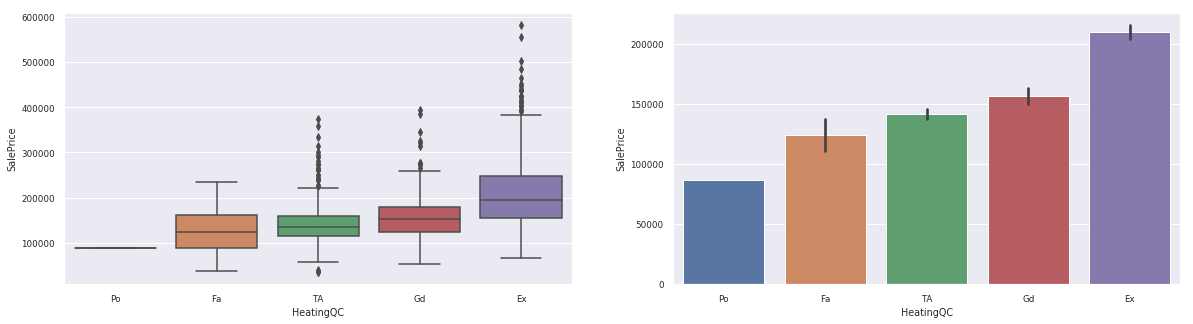

In [177]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="HeatingQC", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"])
plt.subplot(1, 2, 2)
sns.barplot(x="HeatingQC", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"]);

> *Heating Quality shows postive correlation with SalePrice*

In [178]:
joineddata['HeatingQC'] = joineddata['HeatingQC'].map({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})


In [179]:
joineddata['CentralAir'] = joineddata['CentralAir'].map({"Y":1, "N":0})

Text(0.5, 0, 'External Condition')

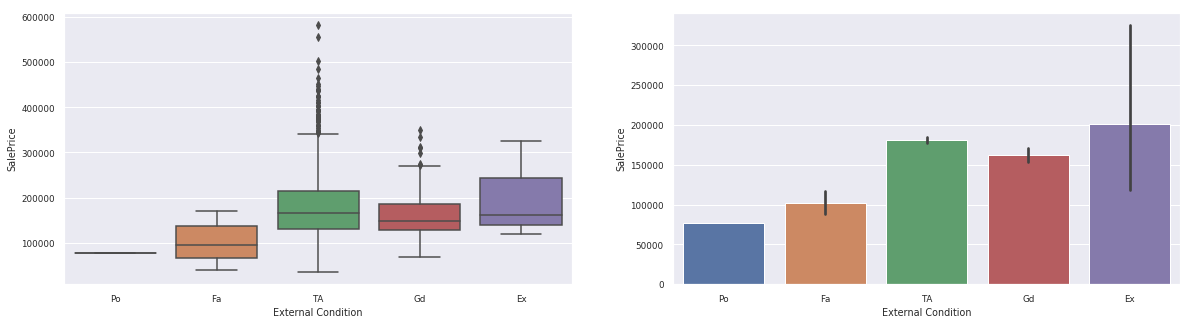

In [180]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="ExterCond", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"])
plt.xlabel("External Condition")
plt.subplot(1, 2, 2)
sns.barplot(x="ExterCond", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"]);
plt.xlabel("External Condition")

Text(0.5, 0, 'Overall Condition')

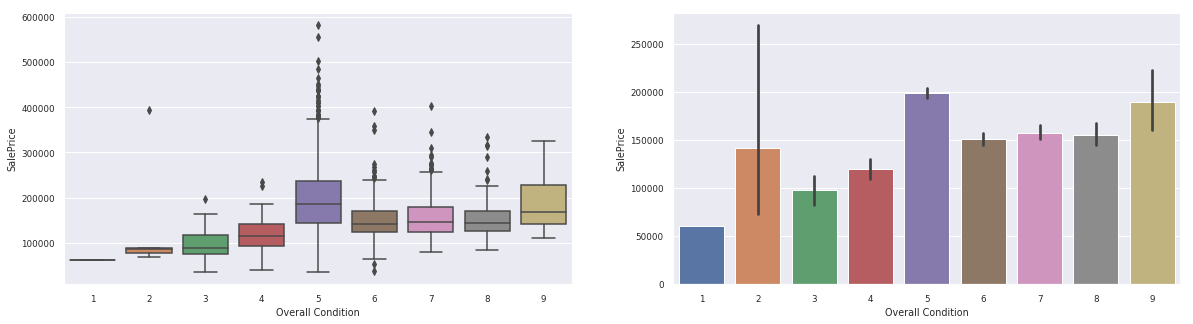

In [181]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="OverallCond", y="SalePrice", data=train)
plt.xlabel("Overall Condition")
plt.subplot(1, 2, 2)
sns.barplot(x="OverallCond", y="SalePrice", data=train);
plt.xlabel("Overall Condition")

> **Exterior covering of House**

Text(0.5, 0, 'Exterior Covering I')

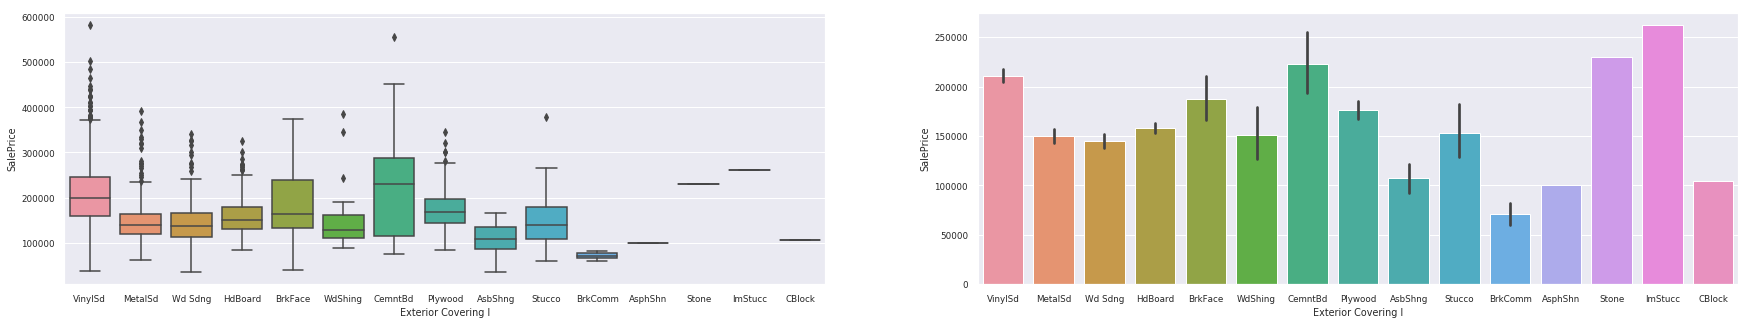

In [182]:
plt.subplots(figsize =(30, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Exterior1st", y="SalePrice", data=train);
plt.xlabel("Exterior Covering I")
plt.subplot(1, 2, 2)
sns.barplot(x="Exterior1st", y="SalePrice", data=train);
plt.xlabel("Exterior Covering I")

Text(0.5, 0, 'Exterior Covering II')

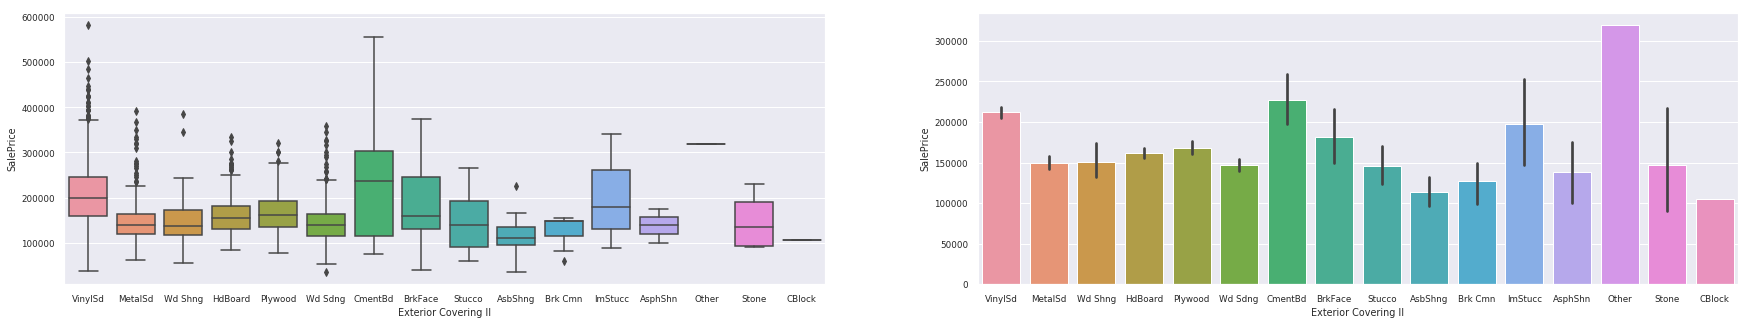

In [183]:
plt.subplots(figsize =(30, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Exterior2nd", y="SalePrice", data=train);
plt.xlabel("Exterior Covering II")
plt.subplot(1, 2, 2)
sns.barplot(x="Exterior2nd", y="SalePrice", data=train);
plt.xlabel("Exterior Covering II")

> *Both these External Covering features show similar behaviours. I created a flag to indicate difference in 2nd exterior covering and first. Then Exterior1st Created and corresponding Dummy Variables*

Text(0.5, 0, 'Pool Quality')

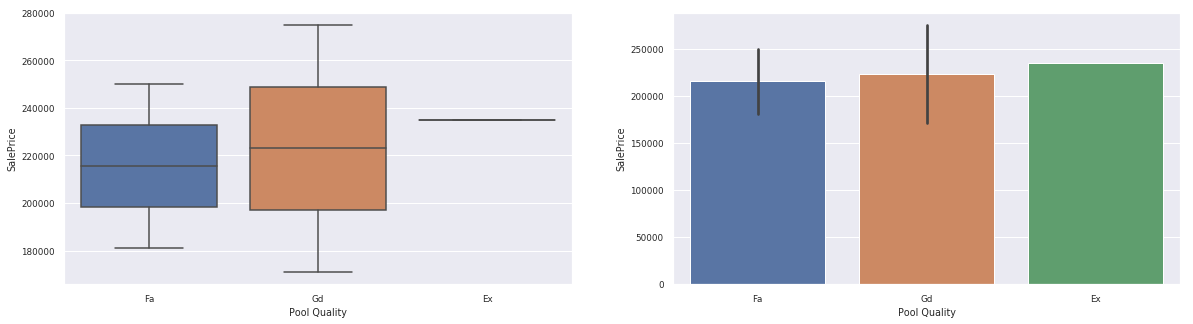

In [184]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="PoolQC", y="SalePrice", data=train, order=["Fa", "Gd", "Ex"])
plt.xlabel("Pool Quality")
plt.subplot(1, 2, 2)
sns.barplot(x="PoolQC", y="SalePrice", data=train, order=["Fa", "Gd", "Ex"]);
plt.xlabel("Pool Quality")

> *We can see that, not many of the houses have Pools. So this Feature is irrelavant and thus dropped.*

> **Plotting the Target Variable to get meaningful insights.**

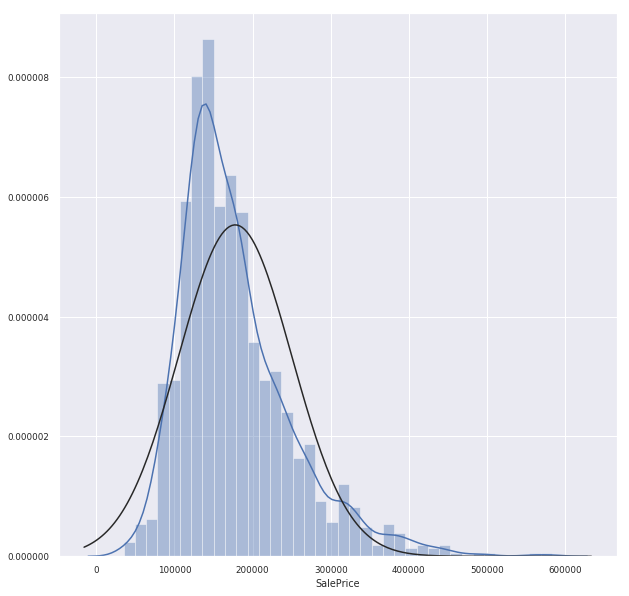

In [185]:
plt.subplots(figsize=(10, 10))
g = sns.distplot(train['SalePrice'], fit=norm, label = "Skewness : %.2f"%(train['SalePrice'].skew()));

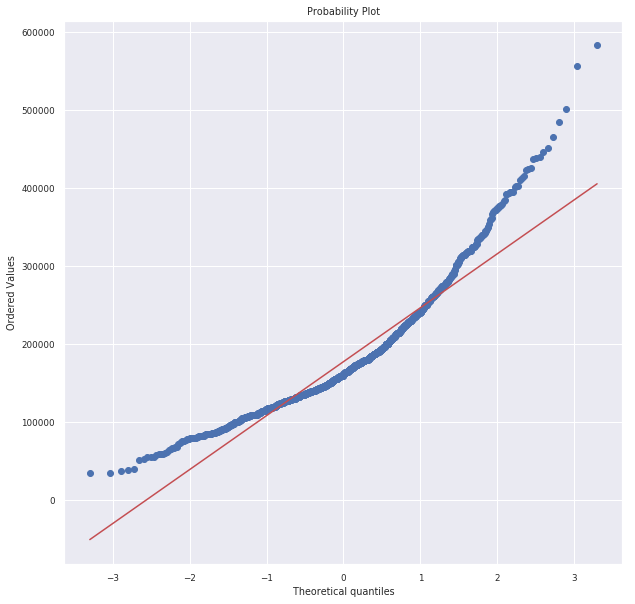

In [186]:
#Get also the QQ-plot
fig = plt.figure(figsize=(10,10))
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

> *Machine Learning Algorithms tends to do well on Normally Distributed data. So we statistically transformed our data into a Normally Distributed data by using the log function*

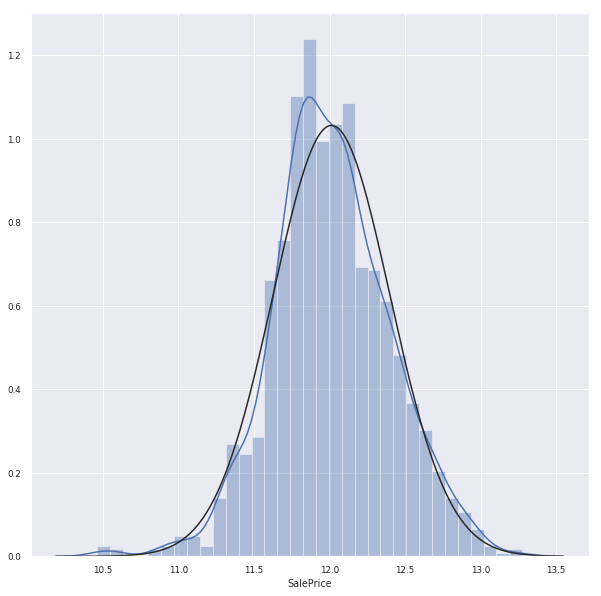

In [187]:
train["SalePrice"] = np.log1p(train["SalePrice"])
plt.subplots(figsize=(10, 10))
g = sns.distplot(train['SalePrice'], fit=norm, label = "Skewness : %.2f"%(train['SalePrice'].skew()));

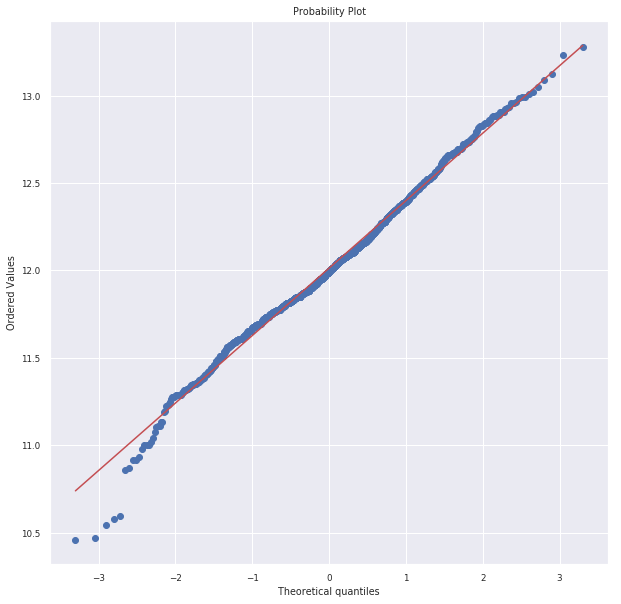

In [188]:
#Get also the QQ-plot
fig = plt.figure(figsize=(10,10))
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

* > **From the above Boxplots,we found meaningful insights. The Features which correlates to SalePrice more or influences SalePrice and are Categorical are manually transformed to values.**
* > **Dummy Variables are created from the Categorical Features that are not ordered.**
* > **Most Irrevalant Features are dropped from the data.**
* > **Scatter plots are used for highly correlating features. Outliers are also removed.**
* > **SalePrice / Target Variable was not Normally Distributed. So I transformed it into a Normally Distributed data.**